In [47]:
# 22개 중 target은 21번째(2018년도 연봉) 

In [48]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차)
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [49]:
df = pd.read_csv('picher_stats_2017.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [50]:
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [70]:
pd.get_dummies(df['선수명'], dtype=float)
pd.get_dummies(df['팀명'], dtype=float)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
df.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


In [53]:
salary_target=df['연봉(2018)'].to_numpy()
salary_input =df.iloc[:,2:].to_numpy()

In [54]:
salary_input

array([[ 1.60e+01,  7.00e+00,  0.00e+00, ...,  6.62e+00,  1.40e+05,
         8.50e+04],
       [ 1.10e+01,  1.10e+01,  1.00e+00, ...,  6.08e+00,  1.20e+05,
         5.00e+04],
       [ 2.00e+01,  6.00e+00,  0.00e+00, ...,  5.64e+00,  2.30e+05,
         1.50e+05],
       ...,
       [ 0.00e+00,  2.00e+00,  0.00e+00, ..., -6.10e-01,  1.00e+04,
         1.60e+04],
       [ 0.00e+00,  3.00e+00,  0.00e+00, ..., -7.00e-01,  4.00e+03,
         2.90e+03],
       [ 4.00e+00,  4.00e+00,  0.00e+00, ..., -1.01e+00,  4.00e+03,
         3.00e+03]])

In [55]:
train_input,test_input,train_target,test_target = train_test_split(
    salary_input,salary_target,random_state=42
)

In [56]:
train_input

array([[ 3.00e+00,  2.00e+00,  1.00e+00, ...,  3.80e-01,  2.50e+04,
         3.30e+04],
       [ 5.00e+00,  1.00e+00,  3.00e+00, ...,  1.38e+00,  1.88e+04,
         1.60e+04],
       [ 3.00e+00,  2.00e+00,  0.00e+00, ..., -4.90e-01,  7.50e+03,
         3.10e+03],
       ...,
       [ 8.00e+00,  4.00e+00,  0.00e+00, ...,  2.25e+00,  1.55e+04,
         1.00e+04],
       [ 0.00e+00,  0.00e+00,  0.00e+00, ...,  3.00e-02,  3.50e+03,
         3.20e+03],
       [ 1.00e+00,  1.00e+00,  0.00e+00, ..., -1.00e-02,  4.20e+03,
         3.70e+03]])

In [57]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [58]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

1.0
1.0


In [59]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [60]:
lr  = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [61]:
print(lr.score(train_poly,train_target))

1.0


In [62]:
print(lr.score(test_poly,test_target))

-1.0748365876433756


In [63]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [64]:
ridge = Ridge()
ridge.fit(train_scaled,train_target)

Ridge()

In [65]:
print(ridge.score(train_scaled,train_target))

0.9999897317609582


In [66]:
print(ridge.score(test_scaled,test_target))

0.9720824877681118


In [67]:
train_score = []
test_score = []
alpha_list = [0.01,0.05,0.1,0.2,1.0,10.0,100.0,500.0]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))


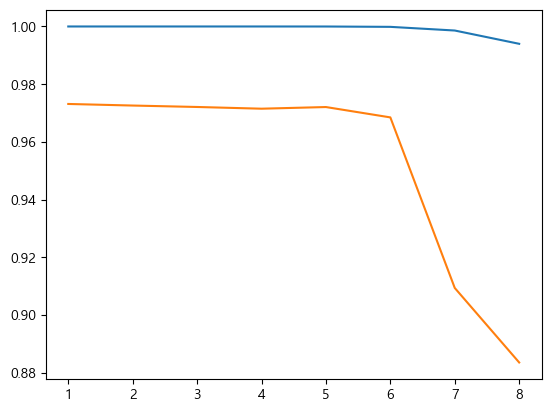

In [68]:
x = np.arange(1,9).reshape(-1,1)
plt.plot(x, train_score)
plt.plot(x, test_score)

In [69]:
ridge = Ridge(alpha=0.01)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9999999962556647
0.9731498051891686
